# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [57]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary Statistics

In [58]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.
cmpD=study_data_complete
grpD = cmpD.groupby('Drug Regimen')["Tumor Volume (mm3)"]


pd.DataFrame({
    'Mean Tumor Volume': grpD.mean(),
    'Median Tumor Volume': grpD.median(),
    'Tumor Volume Variance': grpD.var(),
    'Tumor Volume Std. Dev.': grpD.std(),
    'Tumor Volume Std. Err.': grpD.sem()
})


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
agg_grp = grpD.agg(['mean', 'median', 'var', 'std', 'sem'])    

# This method produces everything in a single groupby function
agg_grp

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

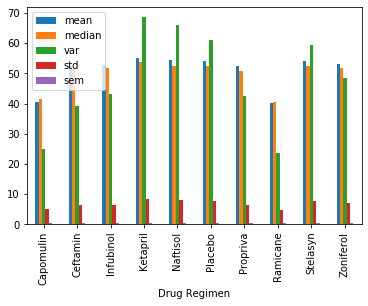

In [60]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
agg_grp.plot(kind='bar')

In [61]:
agg_grp['mean']

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.322552
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: mean, dtype: float64

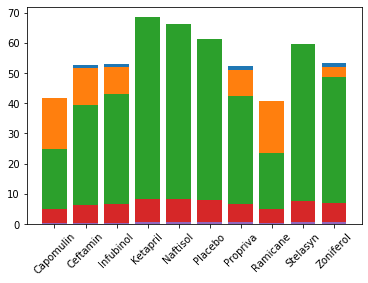

In [62]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(agg_grp.index.array, agg_grp['mean'])
plt.bar(agg_grp.index.array, agg_grp['median'])
plt.bar(agg_grp.index.array, agg_grp['var'])
plt.bar(agg_grp.index.array, agg_grp['std'])
plt.bar(agg_grp.index.array, agg_grp['sem'])

plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Number of Data Points')

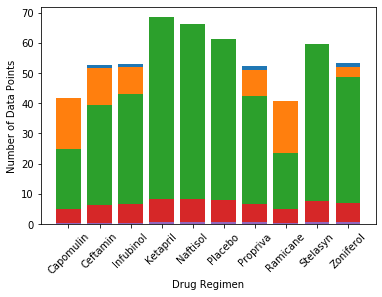

In [63]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(agg_grp.index.array, agg_grp['mean'])
plt.bar(agg_grp.index.array, agg_grp['median'])
plt.bar(agg_grp.index.array, agg_grp['var'])
plt.bar(agg_grp.index.array, agg_grp['std'])
plt.bar(agg_grp.index.array, agg_grp['sem'])

plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")



In [64]:
mouse_metadata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [65]:
mouseD=mouse_metadata.groupby("Sex").count()["Mouse ID"]

In [66]:
mouseD

Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64

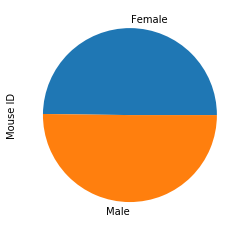

In [67]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouseD.plot(kind='pie')


## Quartiles, Outliers and Boxplots

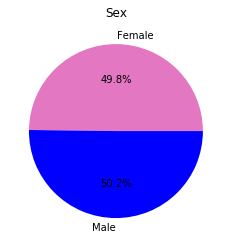

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(
    mouseD,
    labels=mouseD.index.values, 
    autopct='%1.1f%%',
    textprops={'color': 'black'},
    colors=['C6', 'b']
    )

plt.title('Sex')

plt.savefig('Sex_Ratio.png')

plt.show()

In [69]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_max=study_data_complete.groupby('Mouse ID').max().reset_index()
mouse_timepoint_max=tumor_max[['Mouse ID', 'Timepoint']].merge(study_data_complete,on=['Mouse ID', 'Timepoint'], how='left')

mouse_timepoint_max

# Start by getting the last (greatest) timepoint for each mouse
capomulin = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
infubinol = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
ramicane = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']
ceftamin = mouse_timepoint_max.loc[mouse_timepoint_max['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']

Mouse_combined = mouse_timepoint_max[['Mouse ID','Tumor Volume (mm3)']].loc[mouse_timepoint_max['Drug Regimen'].isin(['Capomulin','Infubinol','Ramicane','Ceftamin'])]
Mouse_combined_vol = Mouse_combined.groupby('Mouse ID' ,as_index=False)['Tumor Volume (mm3)'].agg({'Last':'last'})
del Mouse_combined_vol['Mouse ID']
Mouse_combined_vol_list =  Mouse_combined_vol['Last']

quartiles =Mouse_combined_vol_list.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The  median of Tumor Volume (mm3) is: {quartiles[0.5]} ")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint|

# Quantitatively determine capomulin outliers


The lower quartile of Tumor Volume (mm3) is: 37.187743802499995
The upper quartile of Tumor Volume (mm3) is: 59.930261755000004
The interquartile range of Tumor Volume (mm3) is: 22.74251795250001
The  median of Tumor Volume (mm3) is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


In [53]:
# Quantitatively determine ramicane outliers


In [10]:
# Quantitatively determine infubinol outliers


Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


In [11]:
# Quantitatively determine ceftamin outliers


Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


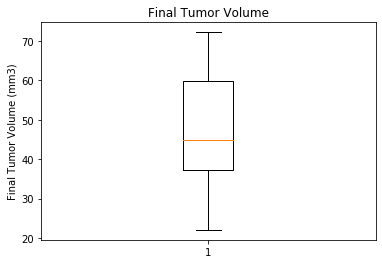

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(Mouse_combined_vol_list)
plt.show()

## Line and Scatter Plots

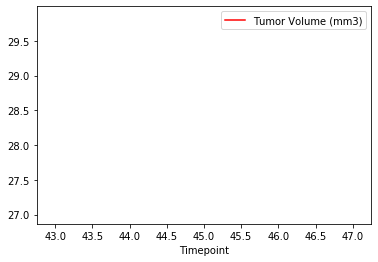

In [70]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_m601 = mouse_timepoint_max.loc[mouse_timepoint_max['Mouse ID']=='m601']
mouse_m601.loc[mouse_m601['Drug Regimen']=='Capomulin'].plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)',color='red')


C:\Users\kehoc\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\kehoc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)

  


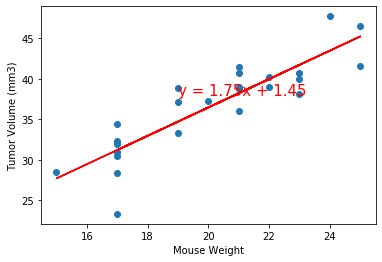

In [71]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_weight = mouse_timepoint_max[['Weight (g)','Mouse ID']].loc[mouse_timepoint_max['Drug Regimen']=='Capomulin']
x_axis = cap_weight.groupby(['Mouse ID'])['Weight (g)'].agg({'Weight':'first'})
x_axis = x_axis['Weight']
x_axis = x_axis.reset_index()
x_axis = x_axis["Weight"]
cap_vol = mouse_timepoint_max[['Tumor Volume (mm3)','Mouse ID']].loc[mouse_timepoint_max['Drug Regimen']=='Capomulin']
y_axis = cap_vol.groupby(['Mouse ID'])['Tumor Volume (mm3)'].agg({'Mean':np.mean})
y_axis = y_axis.reset_index()
y_axis = y_axis['Mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(19,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [73]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation between mouse weight and average tumor volume is {rvalue}")


The correlation between mouse weight and average tumor volume is 0.8767060403658119
